In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [77]:
train = ImageDataGenerator(rescale=1/255)
train_url = '/content/drive/MyDrive/PicTest/Fruit/train'

validation = ImageDataGenerator(rescale=1/255)
validation_url = '/content/drive/MyDrive/PicTest/Fruit/validation'

In [78]:
train_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.1,
                                     height_shift_range = 0.1,
                                     width_shift_range = 0.1,
                                     brightness_range = (0.9,1.1))
train_dataset = train_generator.flow_from_directory(train_url,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                       target_size = (150,150),
                                                       batch_size = 128,
                                                       class_mode = 'categorical')

Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [79]:
train_dataset.class_indices


{'Buoi': 0,
 'Cam': 1,
 'Chuoi': 2,
 'Dau': 3,
 'Du_du': 4,
 'Dua_hau': 5,
 'Me': 6,
 'Nho': 7,
 'Tao': 8,
 'Thom': 9}

In [80]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_57 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_59 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [82]:
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

In [83]:
history = model.fit(train_dataset,batch_size=30,epochs=500,verbose=1,validation_data=validation_dataset)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 11.3195 - accuracy: 0.1000 - val_loss: 2.3176 - val_accuracy: 0.1000
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 42.7398 - accuracy: 0.1000 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 18.0957 - accuracy: 0.0600 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 6.4401 - accuracy: 0.1400 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 3.1916 - accuracy: 0.0600 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 2.4347 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 2.3095 - accuracy: 0.1200 - val_loss: 2.3026 - val_accuracy: 0.1200
Epoch 8/500
1/1 [==============

In [84]:
model.save('/content/drive/MyDrive/PicTest/Fruit/Fruit.h5')

In [85]:
model = load_model('/content/drive/MyDrive/PicTest/Fruit/Fruit.h5')

In [86]:
score=model.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1/1 [==============================] - 1s 968ms/step - loss: 2.2752 - accuracy: 0.2800
Sai số:  2.2752020359039307
Độ chính xác:  0.2800000011920929


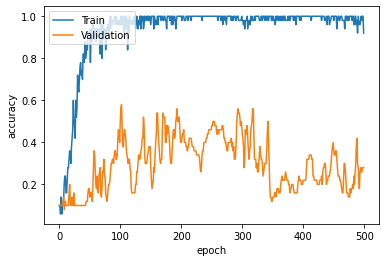

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  Tao


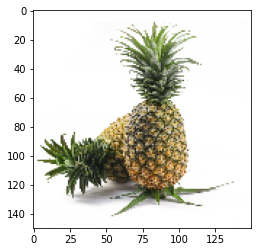

In [88]:
img = load_img('/content/drive/MyDrive/PicTest/Fruit/predict/test.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Buoi','Cam','Chuoi','Dau','Du_du','Dua_hau','Me','Nho','Tao','Thom']
print('Dự đoán là: ',Label[int(np.argmax(model.predict(img),axis=-1))])